<a href="https://colab.research.google.com/github/SarveshD7/PokeGAN-Pokemon-generator-using-Generative-Adversarial-Network/blob/main/Pokemon_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Installing necessary dependencies***

In [ ]:
! pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

***Importing tensorflow and limiting RAM growth***

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
  

***Importing depedencies***

In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.data import Dataset

***Getting the dataset***

In [4]:
path = '/content/data'
imgs = np.sort(os.listdir(path))


In [25]:
import PIL
from PIL import Image
x_train = []
for f in imgs:
  img = Image.open(path+'/'+f)
  img = img.convert('RGB')
  img = img.resize((32, 32))
  img = np.asarray(img)/255
  x_train.append(img)
x_train  = np.array(x_train)
x_train.shape
type(x_train)
data = Dataset.from_tensor_slices(x_train).batch(1)
dataIterator = data.as_numpy_iterator()
# np.split(x_train, 9)
# x_train.shape

In [6]:
print(x_train[0].shape)
dataIterator.next().shape

(32, 32, 3)


(32, 32, 3)

***Building the Neural Network***

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

***Generator***

In [8]:
def build_generator():
  model = Sequential()
  # model.add(Flatten())
  model.add(Dense(8*8, input_dim=32*32*3))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((8, 8, 1)))

  # Upsampling 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))
  
  # Upsampling 2 
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional 2
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional Final
  model.add(Conv2D(3, 4, padding='same', activation='sigmoid'))

  return model

In [9]:
generator = build_generator()

In [10]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 1)           0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 16, 16, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 128)       3328      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                        

In [11]:
image = generator.predict(np.random.randn(1, 1024*3))
image[0].shape
image[0]

1/1 [==============================] - 7s 7s/step


array([[[0.49940813, 0.50235766, 0.49476337],
        [0.49977884, 0.50298977, 0.4938811 ],
        [0.50028527, 0.5018397 , 0.49377307],
        ...,
        [0.49900314, 0.49845743, 0.49999368],
        [0.5006629 , 0.49887255, 0.50055987],
        [0.500078  , 0.49952367, 0.49968132]],

       [[0.49720782, 0.5042325 , 0.48955837],
        [0.4990497 , 0.5019983 , 0.49024433],
        [0.4965415 , 0.4996393 , 0.49043036],
        ...,
        [0.49795815, 0.4962537 , 0.5017424 ],
        [0.4979167 , 0.49935752, 0.50285083],
        [0.49985173, 0.49797878, 0.5009798 ]],

       [[0.49328643, 0.50243485, 0.49395984],
        [0.49356255, 0.50142306, 0.48942   ],
        [0.49339575, 0.49544996, 0.48881632],
        ...,
        [0.49642745, 0.49644664, 0.49967346],
        [0.49768582, 0.49794084, 0.5012295 ],
        [0.4994797 , 0.49853665, 0.50015557]],

       ...,

       [[0.5055072 , 0.50246626, 0.5012605 ],
        [0.49937463, 0.50275916, 0.5000382 ],
        [0.5021016 , 0

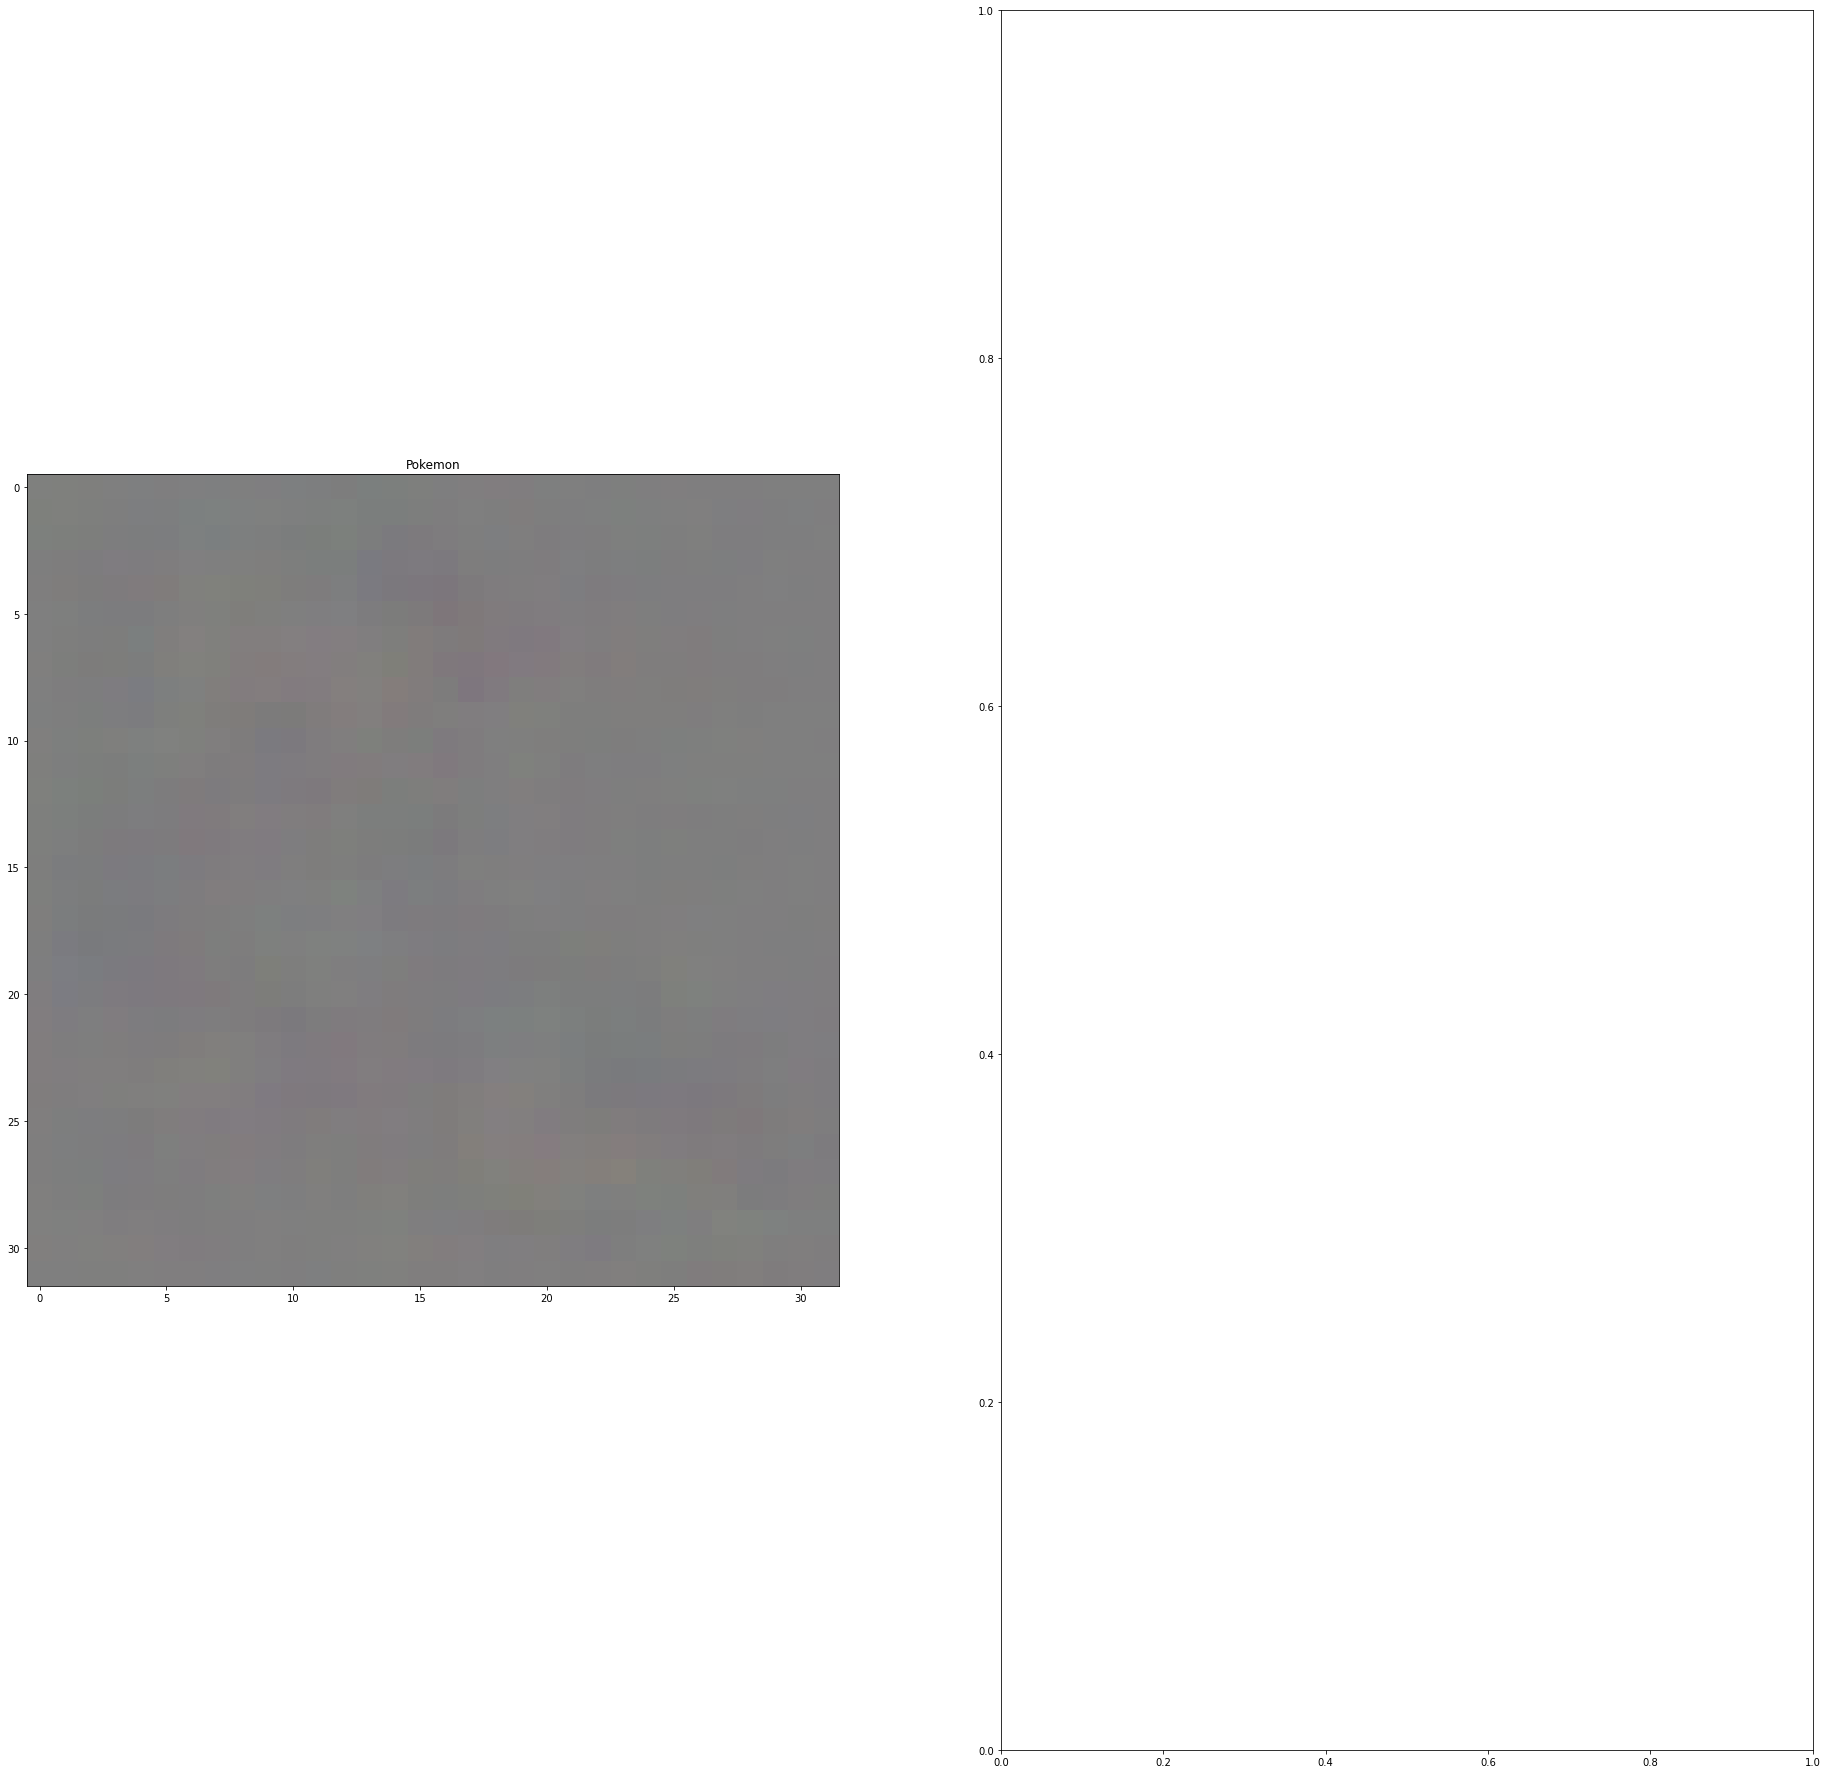

In [12]:
fig, ax = plt.subplots(ncols=2, figsize = (32, 32))
ax[0].imshow(image[0])
ax[0].title.set_text('Pokemon')

In [13]:
def build_discriminator():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32, 5, input_shape=(32, 32, 3)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv Block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv Blokc
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv Block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fifth Conv Block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten and then pass to the Dense Layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [14]:
discriminator = build_discriminator()

In [15]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 128)      

In [16]:
image.shape
image[0].shape

(32, 32, 3)

In [17]:
# We are expanding dimensions to add a batch dimension of 0 or None
discriminator.predict(np.expand_dims(image[0], 0))
# print(np.expand_dims(image[0], 0).shape)

1/1 [==============================] - 0s 192ms/step


array([[0.50321966]], dtype=float32)

Constructing the Training Loops

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [19]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [20]:
from tensorflow.keras.models import Model

In [22]:
class PokeGAN(Model):
  # Passing the generator, discriminator, any positional or keyboard arguments the the init of super (Model) class
  def __init__(self, generator, discriminator,g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().__init__(*args, **kwargs)

    self.generator = generator
    self.discriminator = discriminator
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss
    
  def train_step(self, im):
    # Getting the real and fake images
    real_image = im
    fake_image = self.generator(tf.random.normal([1, 1024*3]), training=False)
    # Training the discriminator
    with tf.GradientTape() as d_tape:
        
      yhat_real = self.discriminator(real_image, training=True)
      yhat_fake = self.discriminator(fake_image, training=True)
    #   print(yhat_real.shape, yhat_fake.shape)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      total_d_loss = self.d_loss(y_realfake, yhat_realfake) 
      
      dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
      self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))                         

      with tf.GradientTape() as g_tape:
        gen_images = self.generator(tf.random.normal([1, 1024*3]), training=True)

        predicted_labels = self.discriminator(gen_images, training=False)

        total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

      pass

    def test_step(self):
      pass


In [ ]:
pokegan = PokeGAN(generator, discriminator, g_opt, d_opt, g_loss, d_loss)
pokegan.compile(g_opt, d_opt, g_loss, d_loss) 
pokegan.fit(data, epochs = 200)
# for step, x_batch_train in enumerate(dataset):
    # x_batch_train = tf.expand_dims(x_batch_train, 0)
    # losses = pokegan(x_batch_train) 

Epoch 1/200
819/819 [==============================] - 14s 15ms/step - d_loss: 0.6929 - g_loss: 0.6734
Epoch 2/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6933 - g_loss: 0.6755
Epoch 3/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6939 - g_loss: 0.6762
Epoch 4/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6929 - g_loss: 0.6755
Epoch 5/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6936 - g_loss: 0.6725
Epoch 6/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6927 - g_loss: 0.6743
Epoch 7/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6934 - g_loss: 0.6706
Epoch 8/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6933 - g_loss: 0.6708
Epoch 9/200
819/819 [==============================] - 13s 16ms/step - d_loss: 0.6937 - g_loss: 0.6666
Epoch 10/200
819/819 [==============================] - 13s 16ms/step - d

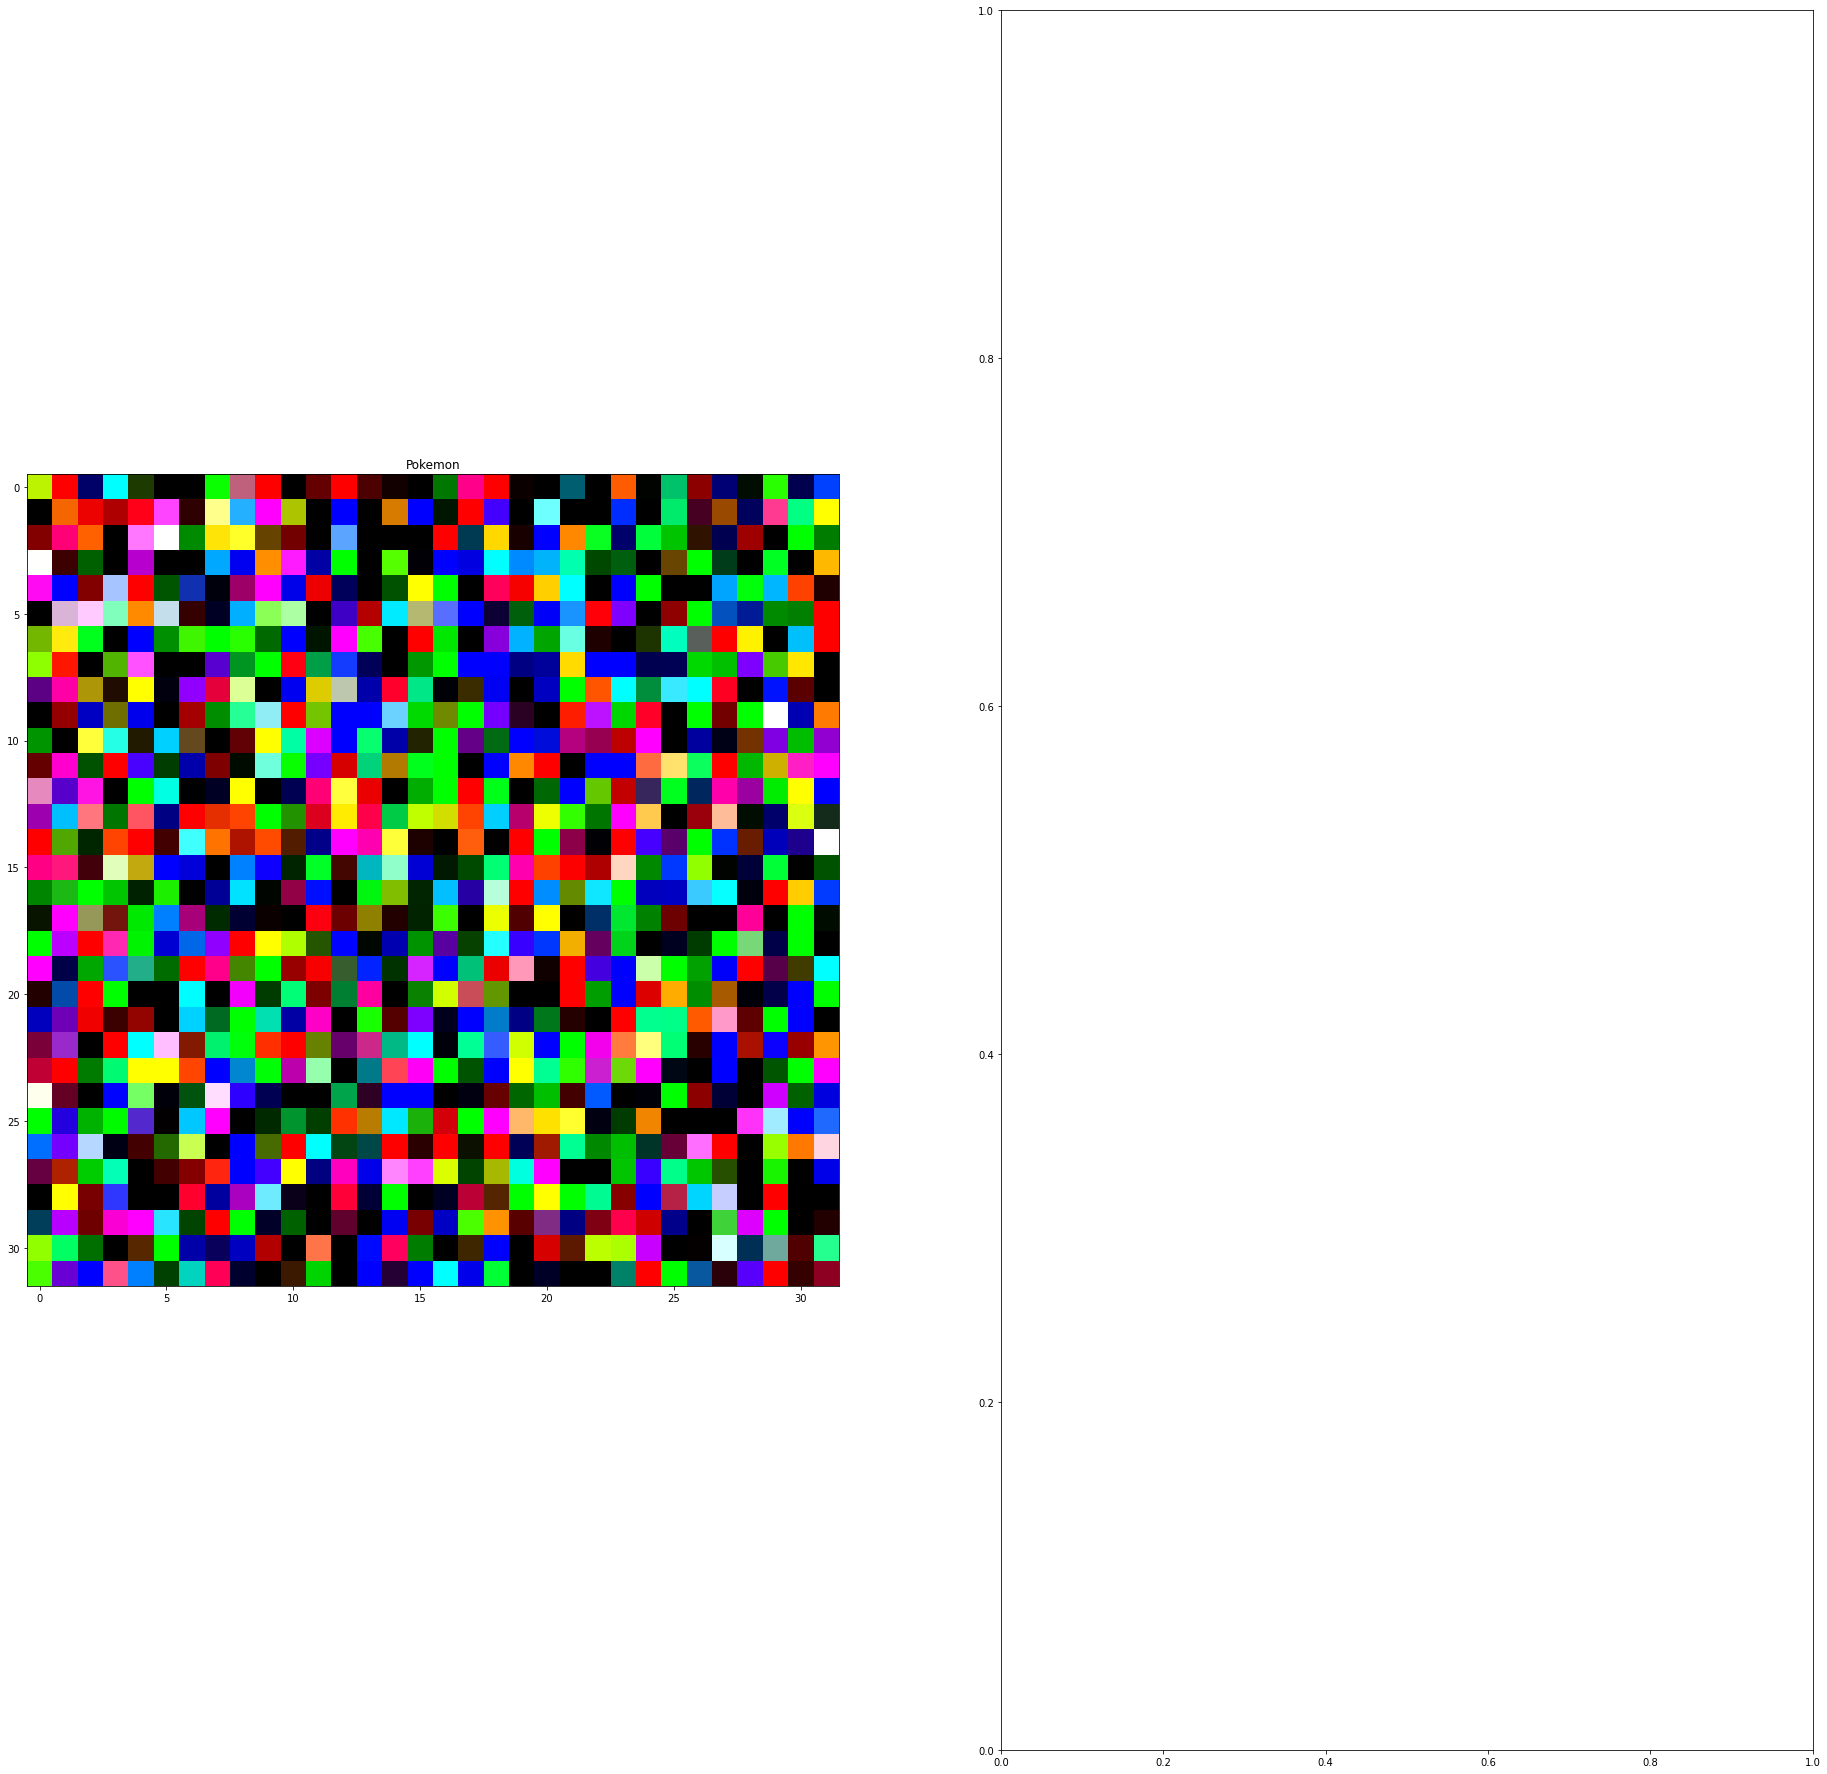

In [39]:
image = np.random.randn(1, 32, 32, 3)
fig, ax = plt.subplots(ncols=2, figsize = (32, 32))
ax[0].imshow(image[0])
ax[0].title.set_text('Pokemon')

In [40]:
image = generator.predict(np.random.randn(1, 1024*3))
image[0].shape
image[0]

1/1 [==============================] - 0s 25ms/step


array([[[1.3472642e-02, 1.5315782e-01, 1.9959405e-02],
        [9.0287440e-03, 4.8241291e-02, 4.1544503e-03],
        [1.0243069e-03, 4.0267484e-04, 4.1259217e-04],
        ...,
        [5.5954172e-03, 4.6436288e-03, 3.1303819e-03],
        [7.1146754e-03, 6.0328245e-03, 3.5911121e-03],
        [1.0596313e-02, 1.6503043e-02, 1.6135151e-02]],

       [[1.5710233e-03, 1.0688059e-02, 1.7552876e-03],
        [8.2139842e-02, 6.5371379e-02, 4.2560231e-03],
        [6.9001951e-04, 1.4579778e-04, 2.5967541e-04],
        ...,
        [4.4235066e-02, 7.9817176e-03, 8.9243054e-03],
        [6.6155773e-03, 3.1326073e-03, 5.3845625e-03],
        [1.2735085e-03, 3.6218299e-03, 5.3721196e-03]],

       [[3.6626225e-03, 9.1011925e-03, 1.2079909e-03],
        [2.5434135e-02, 1.6038589e-02, 1.3442521e-03],
        [1.1448020e-04, 1.9841787e-05, 6.4912483e-06],
        ...,
        [1.9643782e-02, 1.6392511e-03, 2.5500669e-03],
        [7.0460718e-03, 4.4015860e-03, 3.5238271e-03],
        [7.0492073e-04

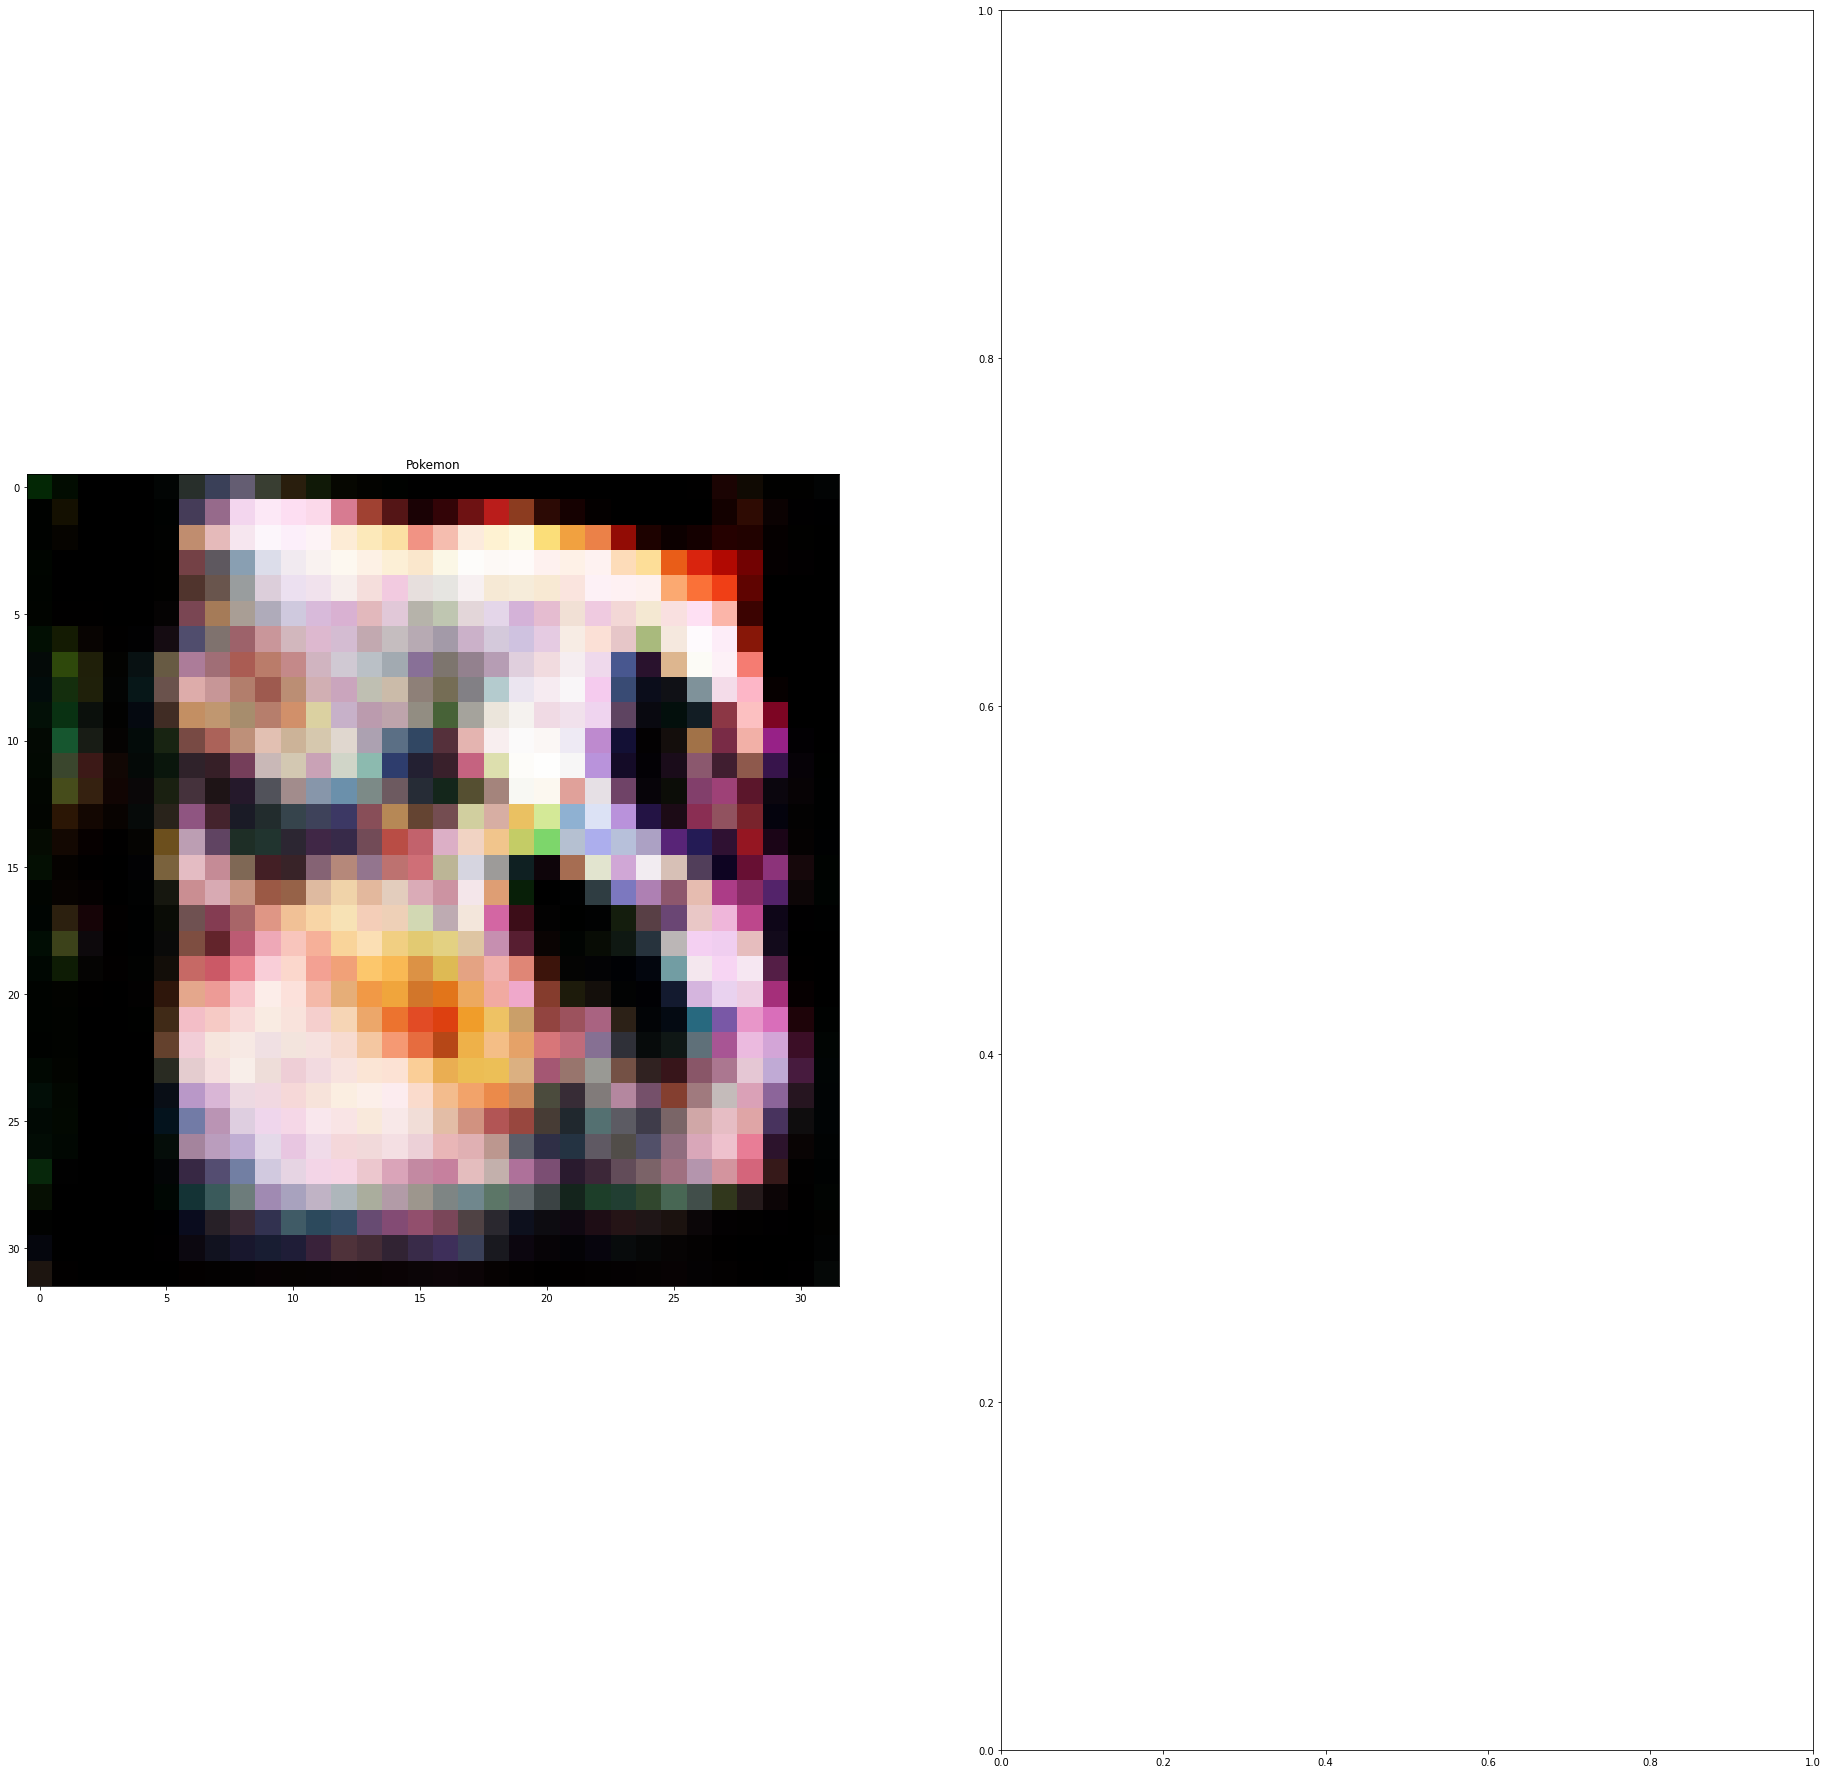

In [41]:
fig, ax = plt.subplots(ncols=2, figsize = (32, 32))
ax[0].imshow(image[0])
ax[0].title.set_text('Pokemon')